# Make Requests To Google Cloud Vision API With Python Client Library
## Install the client library
```bash
$ pip install --upgrade google-cloud-vision
```
- [Cloud Vision API](https://gcloud-python.readthedocs.io/en/latest/vision/gapic/v1/api.html)

## Label detection
Now you can use the Vision API to request information from an image, such as label detection. Run the following code to perform your first image label detection request:

In [1]:
# Imports stanadard Python libraries
import sys, io, os, pprint

# Imports the Google OAuth2 service account
from google.oauth2 import service_account

# Imports the Google Cloud client library
from google.cloud import vision
from google.cloud.vision import types

import argparse
from PIL import Image, ImageDraw, ImageFont

In [2]:
FACE_IMAGE = 'standard-face.jpg'
SERVICE_ACCOUNT_FILE = './OCIDeepGauge-eaa8c9248a8d.json'
creds = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE)

In [3]:
# Instantiates a client
client = vision.ImageAnnotatorClient(credentials=creds)

# The name of the image file to annotate
file_name = os.path.join(os.path.dirname('./'), FACE_IMAGE)

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = types.Image(content=content)

# Performs label detection on the image file
response = client.label_detection(image=image)
labels = response.label_annotations

print('Labels:')
for label in labels:
    print(label.description)

# pprint.pprint(response)

Labels:
beauty
girl
photography
chin
black hair
portrait
long hair
brown hair
model
photo shoot


## Face detection

In [4]:
"""Draws squares around detected faces in the given image."""
"""
label_detection(image, options=None, **kwargs)
Perform label detection.

Parameters: image (Image) – The image to analyze.
options (google.gax.CallOptions) – Overrides the default settings for this call, e.g, timeout, retries, etc.
kwargs (dict) – Additional properties to be set on the AnnotateImageRequest.
Returns: The API response.

Return type: AnnotateImageResponse
"""
def detect_face(face_file, max_results=4):
    """Uses the Vision API to detect faces in the given file.

    Args:
        face_file: A file-like object containing an image with faces.

    Returns:
        An array of Face objects with information about the picture.
    """
    client = vision.ImageAnnotatorClient(credentials=creds)

    content = face_file.read()
    image = types.Image(content=content)

    return client.face_detection(image=image).face_annotations


def highlight_faces(image, faces, output_filename):
    """Draws a polygon around the faces, then saves to output_filename.

    Args:
      image: a file containing the image with the faces.
      faces: a list of faces found in the file. This should be in the format
          returned by the Vision API.
      output_filename: the name of the image file to be created, where the
          faces have polygons drawn around them.
    """
    im = Image.open(image)
    draw = ImageDraw.Draw(im)
    # Sepecify the font-family and the font-size
#     font = ImageFont.truetype("arial.ttf", 25)
    for face in faces:
        box = [(vertex.x, vertex.y)
               for vertex in face.bounding_poly.vertices]
        draw.line(box + [box[0]], width=5, fill='#00ff00')
        # Place the confidence value/score of the detected faces above the
        # detection box in the output image
        draw.text(((face.bounding_poly.vertices)[0].x,
                   (face.bounding_poly.vertices)[0].y - 30),
                  str(format(face.detection_confidence, '.3f')) + '%',
                fill='#FF0000',
#                  font=font
                 )
    im.save(output_filename)


def main(input_filename, output_filename, max_results):
    with open(input_filename, 'rb') as image:
        faces = detect_face(image, max_results)
        print('Found {} face{}'.format(
            len(faces), '' if len(faces) == 1 else 's'))

        print('Writing to file {}'.format(output_filename))
        # Reset the file pointer, so we can read the file again
        image.seek(0)
        highlight_faces(image, faces, output_filename)

        
        
OUTPUT= 'detect-{}'.format(FACE_IMAGE)
RESULTS='1'


main(FACE_IMAGE, OUTPUT, RESULTS)

Found 1 face
Writing to file detect-standard-face.jpg


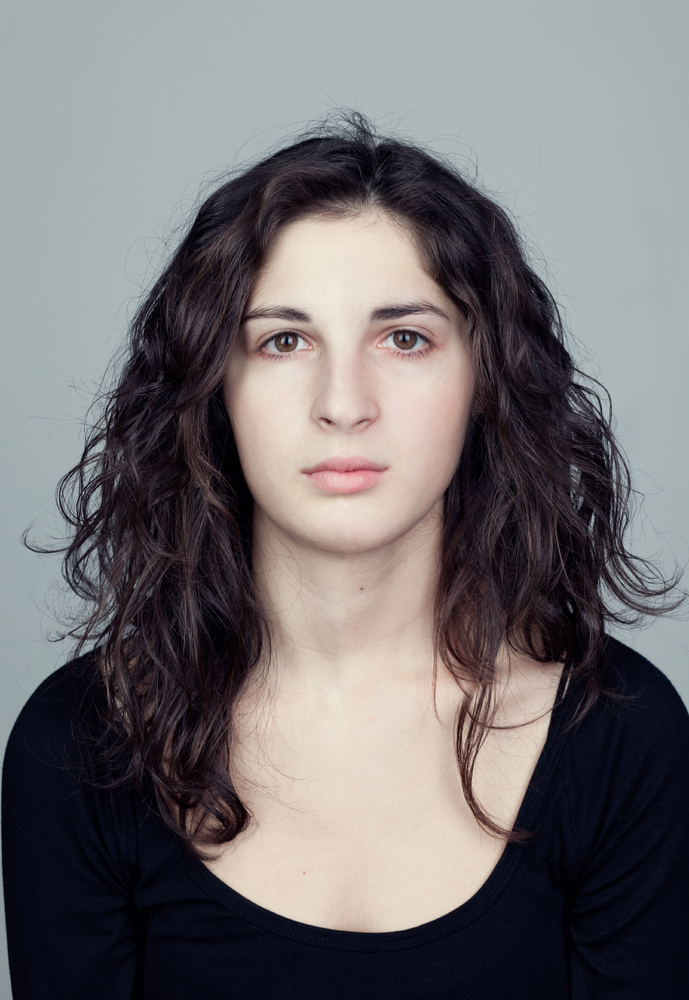

In [5]:
from IPython.display import Image
Image(filename=FACE_IMAGE)

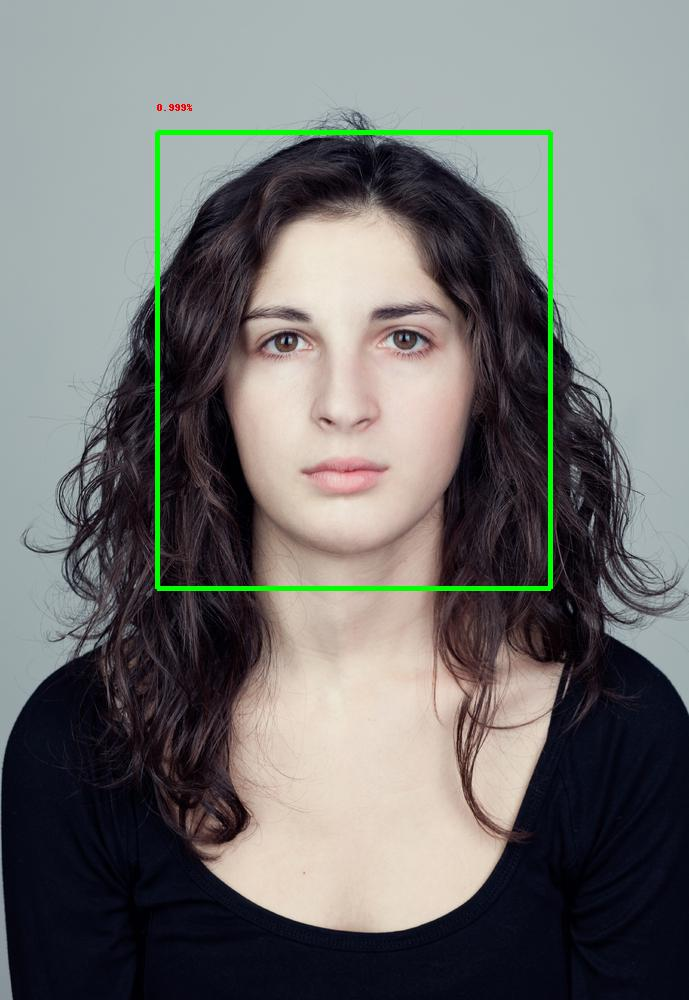

In [6]:
Image(filename=OUTPUT)

## Detecting Faces
Face Detection detects multiple faces within an image along with the associated key facial attributes such as emotional state or wearing headwear. Facial Recognition is not supported.

In [7]:
def detect_faces(path):
    """Detects faces in an image."""
    client = vision.ImageAnnotatorClient(credentials=creds)

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.face_detection(image=image)
    faces = response.face_annotations
    
#     pprint.pprint(response)
    
    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE', 'LIKELY', 'VERY_LIKELY')
    print('Faces:')
    
    for face in faces:
        print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
        print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
        print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))
        print('sorrow: {}'.format(likelihood_name[face.sorrow_likelihood]))
        print('headwear: {}'.format(likelihood_name[face.headwear_likelihood]))
        print('blurred: {}'.format(likelihood_name[face.blurred_likelihood]))
        print('under exposed: {}'.format(likelihood_name[face.under_exposed_likelihood]))

        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])

        print('face bounds: {}'.format(','.join(vertices)))
        
    

In [8]:
detect_faces(FACE_IMAGE)

Faces:
anger: VERY_UNLIKELY
joy: VERY_UNLIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
headwear: VERY_UNLIKELY
blurred: VERY_UNLIKELY
under exposed: VERY_UNLIKELY
face bounds: (157,132),(550,132),(550,588),(157,588)


## image_properties(image, options=None, **kwargs)
Return image properties information.

In [9]:
"""
Parameters:  image (Image) – The image to analyze.
options (google.gax.CallOptions) – Overrides the default settings for this call, e.g, timeout, retries, etc.
kwargs (dict) – Additional properties to be set on the AnnotateImageRequest.

Returns:  The API response.

Return type:  AnnotateImageResponse
"""

path=FACE_IMAGE
client = vision.ImageAnnotatorClient(credentials=creds)

with io.open(path, 'rb') as image_file:
    content = image_file.read()

image = vision.types.Image(content=content)

response = client.image_properties(image=image)
pprint.pprint(response)

image_properties_annotation {
  dominant_colors {
    colors {
      color {
        red: 18.0
        green: 15.0
        blue: 23.0
      }
      score: 0.33243444561958313
      pixel_fraction: 0.3038378953933716
    }
    colors {
      color {
        red: 179.0
        green: 184.0
        blue: 184.0
      }
      score: 0.20569172501564026
      pixel_fraction: 0.2638952136039734
    }
    colors {
      color {
        red: 162.0
        green: 167.0
        blue: 168.0
      }
      score: 0.09116201847791672
      pixel_fraction: 0.10686127841472626
    }
    colors {
      color {
        red: 53.0
        green: 45.0
        blue: 51.0
      }
      score: 0.07565051317214966
      pixel_fraction: 0.06861276179552078
    }
    colors {
      color {
        red: 213.0
        green: 194.0
        blue: 180.0
      }
      score: 0.06702806055545807
      pixel_fraction: 0.05909949913620949
    }
    colors {
      color {
        red: 232.0
        green: 217.0
        blu

## safe_search_detection(image, options=None, **kwargs)
Perform safe search detection.

In [10]:
"""
Parameters: image (Image) – The image to analyze.
options (google.gax.CallOptions) – Overrides the default settings for this call, e.g, timeout, retries, etc.
kwargs (dict) – Additional properties to be set on the AnnotateImageRequest.
Returns: The API response.

Return type: AnnotateImageResponse
"""

path=FACE_IMAGE
client = vision.ImageAnnotatorClient(credentials=creds)

with io.open(path, 'rb') as image_file:
    content = image_file.read()

image = vision.types.Image(content=content)

response = client.safe_search_detection(image=image)
pprint.pprint(response)

safe_search_annotation {
  adult: VERY_UNLIKELY
  spoof: VERY_UNLIKELY
  medical: VERY_UNLIKELY
  violence: VERY_UNLIKELY
  racy: VERY_UNLIKELY
}



## landmark_detection(image, options=None, **kwargs)
Perform landmark detection.
```
Parameters:	
- image (Image) – The image to analyze.
- options (google.gax.CallOptions) – Overrides the default settings for this call, e.g, timeout, retries, etc.
- kwargs (dict) – Additional properties to be set on the AnnotateImageRequest.

Returns: The API response.

Return type: AnnotateImageResponse
```

## logo_detection(image, options=None, **kwargs)
Perform logo detection.
```
Parameters:	
- image (Image) – The image to analyze.
- options (google.gax.CallOptions) – Overrides the default settings for this call, e.g, timeout, retries, etc.
- kwargs (dict) – Additional properties to be set on the AnnotateImageRequest.

Returns: The API response.

Return type: AnnotateImageResponse
```

## text_detection(image, options=None, **kwargs)#
Perform text detection.

## web_detection(image, options=None, **kwargs)
Perform web detection.